## **_Cat or not cat_ con una _MLP_**

**1. Importamos las librerías necesarias**

In [1]:
# generales:
import cv2, h5py
import numpy as np
import pandas as pd
from colorama import Fore

# para las redes neuronales:
import torch

# para plotting:
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

print(f"{Fore.LIGHTRED_EX}Pytorch version: {Fore.LIGHTMAGENTA_EX}{torch.__version__}{Fore.RESET}")
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    print(f"{Fore.LIGHTMAGENTA_EX}The current {Fore.LIGHTRED_EX}Pytorch{Fore.LIGHTMAGENTA_EX} installation was built with MPS activated{Fore.RESET}")

Pytorch version: 1.13.0
The current Pytorch installation was built with MPS activated


In [2]:
def plot_cats(X, y):
    fig = plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(241)
    ax2 = plt.subplot(242)
    ax3 = plt.subplot(243)
    ax4 = plt.subplot(244)
    ax5 = plt.subplot(245)
    ax6 = plt.subplot(246)
    ax7 = plt.subplot(247)
    ax8 = plt.subplot(248)
    ax1.set_title("is cat" if y[1] else "is not cat")
    ax2.set_title("is cat" if y[2] else "is not cat")
    ax3.set_title("is cat" if y[3] else "is not cat")
    ax4.set_title("is cat" if y[4] else "is not cat")
    ax5.set_title("is cat" if y[5] else "is not cat")
    ax6.set_title("is cat" if y[6] else "is not cat")
    ax7.set_title("is cat" if y[7] else "is not cat")
    ax8.set_title("is cat" if y[8] else "is not cat")
    ax1.imshow(X[1, :, :, :])
    ax2.imshow(X[2, :, :, :])
    ax3.imshow(X[3, :, :, :])
    ax4.imshow(X[4, :, :, :])
    ax5.imshow(X[5, :, :, :])
    ax6.imshow(X[6, :, :, :])
    ax7.imshow(X[7, :, :, :])
    ax8.imshow(X[8, :, :, :])
    plt.show()
    # f"{originalTrainX.shape}, {originalTrainy.shape}"

In [3]:
def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

In [4]:
def pad_and_resize(img, pad=False, desired_size=64):
    if pad:
        pad_width = get_pad_width(img, max(img.shape))
        padded = np.pad(img, pad_width=pad_width, mode='constant', constant_values=0)
    else:
        padded = img
    resized = cv2.resize(padded, (desired_size,)*2).astype('uint8')
    return resized

In [5]:
def get_test_images(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    img = np.asarray(image)
    img = pad_and_resize(img)
    return img

In [6]:
def plot_test_cats(X1, X2, X3):
    fig = plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(231)
    ax2 = plt.subplot(232)
    ax3 = plt.subplot(233)
    ax1.set_title("is cat")
    ax2.set_title("is cat")
    ax3.set_title("is not cat")
    ax1.imshow(X1)
    ax2.imshow(X2)
    ax3.imshow(X3)
    plt.show()
    # f"{tmp1.shape}, {tmp2.shape}, {tmp3.shape}"

**2. Cargar el dataset de imágenes de gatos y no gatos**

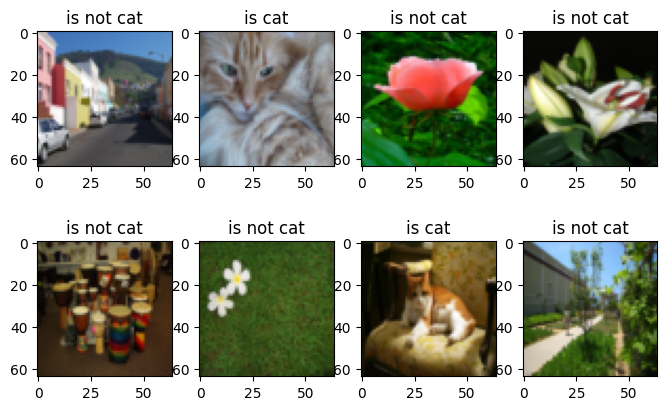

In [7]:
path = "./utils/"
train_dataset = h5py.File(f"{path}train_catvnoncat.h5", "r")
test_dataset  = h5py.File(f"{path}test_catvnoncat.h5",  "r")

X_train = np.array(train_dataset["train_set_x"][:]) # train set features
y_train = np.array(train_dataset["train_set_y"][:]) # train set labels
X_test  = np.array(test_dataset["test_set_x"][:])   # test set features
y_test  = np.array(test_dataset["test_set_y"][:])   # test set labels

plot_cats(X_train, y_train)

**3. Cargar el dataset de imágenes propias**

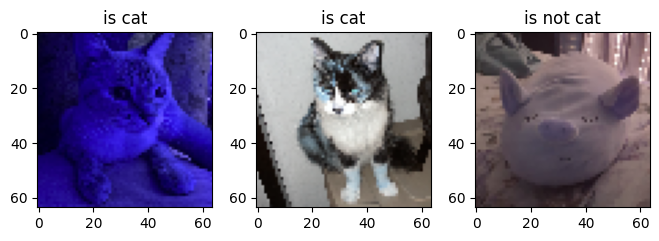

In [8]:
path = "./utils/test/"
cat1 = get_test_images(f"{path}1.png")
cat2 = get_test_images(f"{path}2.png")
cat3 = get_test_images(f"{path}3.png")

plot_test_cats(cat1, cat2, cat3)

**4. Preparar los datos**

In [9]:
def transform_data(X_data, y_data):
    pixels = 255
    items  = X_data.shape[0]
    X = X_data.reshape(items, -1)/pixels
    y = np.expand_dims(y_data, axis=1)
    return X, y

In [10]:
def get_tensors(X, y):
    X_tensor = torch.from_numpy(X).float().to("mps")
    y_tensor = torch.from_numpy(y).float().to("mps")
    return X_tensor, y_tensor

In [11]:
def get_categories(y_data):
    y = sorted(y_data)
    res, i, n = 0, 0, len(y)
    while i < n:
        while i < n - 1 and y[i] == y[i + 1]:
            i += 1
        res += 1
        i += 1
    return res

In [12]:
def get_data_params(X, y):
    features   = X.shape[1]
    categories = get_categories(y)
    samples    = X.shape[0]
    return features, categories, samples

**5. Calculamos las dimensiones requeridas para el perceptrón**

In [13]:
X, y = transform_data(X_train, y_train)
print(f"{Fore.LIGHTRED_EX}{X.shape}{Fore.RESET}, {Fore.LIGHTMAGENTA_EX}{y.shape}{Fore.RESET}")

(209, 12288), (209, 1)


In [14]:
X_tensor, y_tensor = get_tensors(X, y)
print(f"{Fore.LIGHTRED_EX}{X_tensor.shape}{Fore.RESET}, {Fore.LIGHTMAGENTA_EX}{y_tensor.shape}{Fore.RESET}")

torch.Size([209, 12288]), torch.Size([209, 1])


In [15]:
X_t, y_t = transform_data(X_test, y_test)
print(f"{Fore.LIGHTRED_EX}{X_t.shape}{Fore.RESET}, {Fore.LIGHTMAGENTA_EX}{y_t.shape}{Fore.RESET}")

(50, 12288), (50, 1)


In [16]:
X_tensor_test, y_tensor_test = get_tensors(X_t, y_t)
print(f"{Fore.LIGHTRED_EX}{X_tensor.shape}{Fore.RESET}, {Fore.LIGHTMAGENTA_EX}{y_tensor.shape}{Fore.RESET}")

torch.Size([209, 12288]), torch.Size([209, 1])


In [17]:
features, categories, samples = get_data_params(X, y)
print(f"{Fore.LIGHTMAGENTA_EX}{features} {categories} {samples}{Fore.RESET}")

12288 2 209


## **Modelo del _MLP_ en _Pytorch_**

In [18]:
class MLP(torch.nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(inputs, 20)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(20, 7)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear( 7, 5)
        self.relu3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear( 5, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        z1 = self.fc1(x)
        y1 = self.relu1(z1)
        z2 = self.fc2(y1)
        y2 = self.relu2(z2)
        z3 = self.fc3(y2)
        y3 = self.relu3(z3)
        z4 = self.fc4(y3)
        y  = self.sigmoid(z4)
        return y

**6. Instanciamos y entrenamos nuestro modelo**

In [19]:
model = MLP(inputs=features)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
epochs = 15000

print(f"{Fore.LIGHTRED_EX}Model: \n{Fore.RESET}{model}")
print(f"{Fore.LIGHTMAGENTA_EX}Loss function: {Fore.RESET}BCELoss")
print(f"{Fore.LIGHTCYAN_EX}Optimizer: {Fore.RESET}SGD(lr=0.002)")
print(f"{Fore.LIGHTGREEN_EX}Epochs: {Fore.RESET}{epochs}")

Model: 
MLP(
  (fc1): Linear(in_features=12288, out_features=20, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=20, out_features=7, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=7, out_features=5, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Loss function: BCELoss
Optimizer: SGD(lr=0.002)
Epochs: 15000


In [20]:
model.to("mps")
model.train()

historial = pd.DataFrame()

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred_test = model(X_tensor_test).round()
        correct  = (y_pred_test == y_tensor_test).sum()
        accuracy = 100 * correct / float(len(y_tensor_test))
        computed_loss = round(loss.item(), 4)
        
    if epoch%500 == 0 or epoch == 0:
        print(f"{Fore.LIGHTRED_EX}Epoch: {Fore.RESET}{epoch}", end="")
        print(f"{Fore.LIGHTMAGENTA_EX}, loss: {Fore.RESET}{computed_loss}", end="")
        print(f"{Fore.LIGHTCYAN_EX}, accuracy: {Fore.RESET}{accuracy}")
        
    tmp = pd.DataFrame(data={
        "epoch": epoch,
        "loss": computed_loss,
        "accuracy": accuracy
    }, index=[0])
    historial = pd.concat(objs=[historial, tmp], ignore_index=True, sort=False)

Epoch: 0, loss: 0.73, accuracy: 66.0
Epoch: 500, loss: 0.6752, accuracy: 34.0
Epoch: 1000, loss: 0.6609, accuracy: 34.0
Epoch: 1500, loss: 0.651, accuracy: 34.0
Epoch: 2000, loss: 0.6458, accuracy: 34.0
Epoch: 2500, loss: 0.6438, accuracy: 34.0
Epoch: 3000, loss: 0.6422, accuracy: 34.0
Epoch: 3500, loss: 0.6401, accuracy: 34.0
Epoch: 4000, loss: 0.636, accuracy: 34.0
Epoch: 4500, loss: 0.6281, accuracy: 34.0
Epoch: 5000, loss: 0.6088, accuracy: 34.0
Epoch: 5500, loss: 0.5819, accuracy: 34.0
Epoch: 6000, loss: 0.5427, accuracy: 34.0
Epoch: 6500, loss: 0.488, accuracy: 34.0
Epoch: 7000, loss: 0.4205, accuracy: 58.0
Epoch: 7500, loss: 0.351, accuracy: 60.0
Epoch: 8000, loss: 0.2864, accuracy: 62.0
Epoch: 8500, loss: 0.2264, accuracy: 66.0
Epoch: 9000, loss: 0.1278, accuracy: 74.0
Epoch: 9500, loss: 0.0812, accuracy: 74.0
Epoch: 10000, loss: 0.0614, accuracy: 72.0
Epoch: 10500, loss: 0.0509, accuracy: 72.0
Epoch: 11000, loss: 0.0438, accuracy: 72.0
Epoch: 11500, loss: 0.0376, accuracy: 72.

### **Interpretando resultados**

**7. Observamos la función de pérdida de nuestro modelo durante el entrenamiento**

In [21]:
def plot_metrics(historial):
    fig = plt.figure(figsize=(10, 10))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    ax1.set_title("Loss")
    ax2.set_title("Accuracy")
    ax1.plot(historial["epoch"], historial["loss"], label="Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax2.plot(historial["epoch"], historial["accuracy"], label="Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

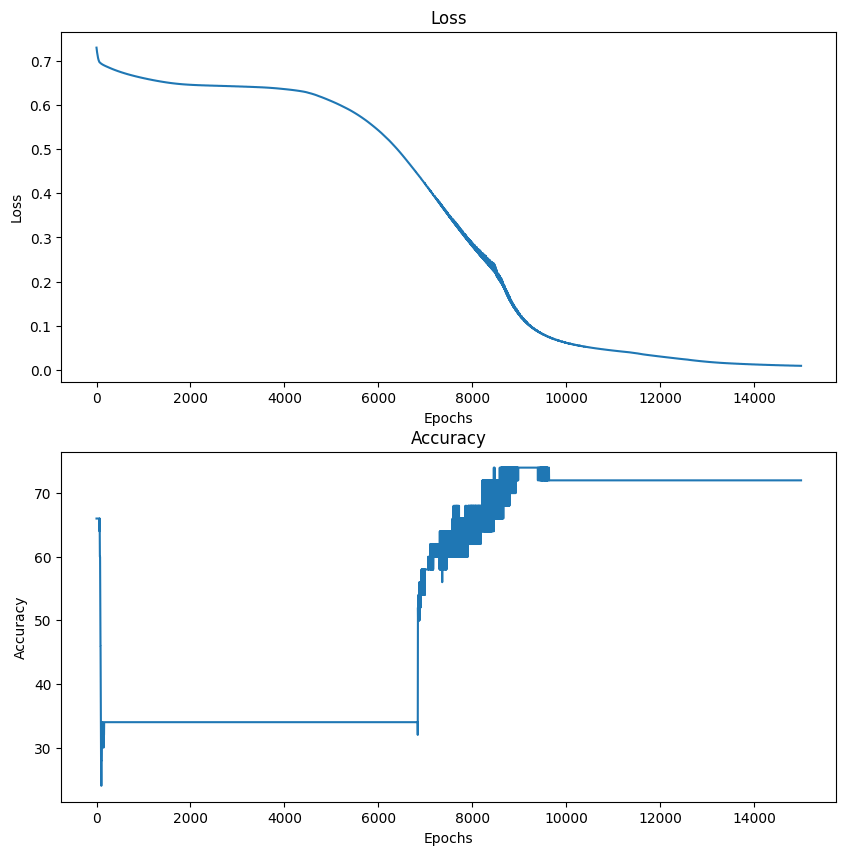

In [22]:
plot_metrics(historial)

### **Clasificando imágenes**

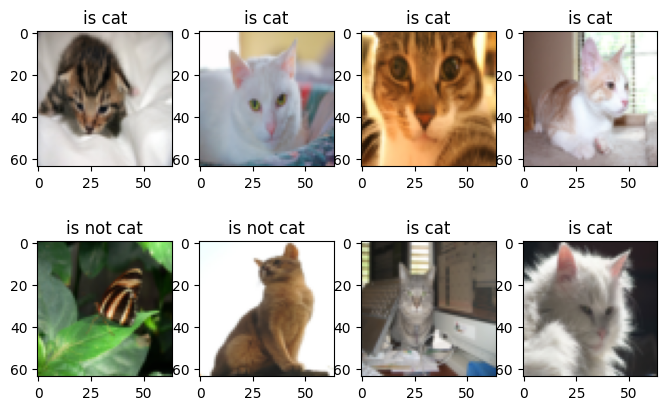

In [23]:
model.eval()
y_pred_test = model(X_tensor_test).round()
y_pred = y_pred_test.numpy(force=True)

plot_cats(X_test, y_pred)

In [24]:
def plot_predicted_cats(X1, X2, X3, y):
    fig = plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(231)
    ax2 = plt.subplot(232)
    ax3 = plt.subplot(233)
    ax1.set_title("is cat" if y[0] else "is not cat")
    ax2.set_title("is cat" if y[1] else "is not cat")
    ax3.set_title("is cat" if y[2] else "is not cat")   
    ax1.imshow(X1)
    ax2.imshow(X2)
    ax3.imshow(X3)
    plt.show()

/var/folders/6b/b6yxg_9x5pl70_2n45d1hq_w0000gn/T/ipykernel_29335/93447302.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646703877/work/torch/csrc/utils/tensor_new.cpp:233.)
  cats = torch.FloatTensor([


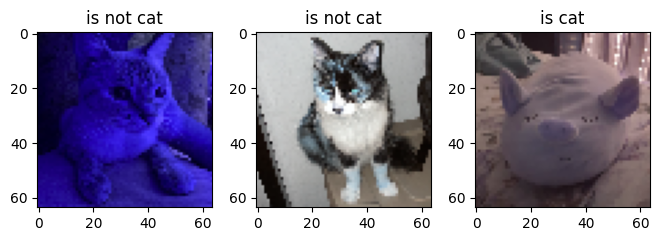

In [25]:
pixels = 255
cats = torch.FloatTensor([
    np.expand_dims(cat1, axis=0).reshape(1, -1)/pixels,
    np.expand_dims(cat2, axis=0).reshape(1, -1)/pixels,
    np.expand_dims(cat3, axis=0).reshape(1, -1)/pixels
]).to("mps")

model.eval()
y_cats = model(cats).round().numpy(force=True)

plot_predicted_cats(cat1, cat2, cat3, y_cats)